Titanic Survivor Model, v1
Mickey Whittaker
6/11/25

Read CSV data

In [2]:
import pandas as pd

train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
print(train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Drop Name and Ticket columns, not valuable to my understanding

In [3]:
cleaning = train.drop(['Name','Ticket'], axis=1)

Replace Sex with binary is_male 1 (yes) or female (0)

In [ ]:
cleaning['is_male'] = cleaning['Sex'].replace({'male':1, 'female': 0})
cleaning.head()

drop old 'Sex' column

In [ ]:
cleaning.drop('Sex', axis=1, inplace=True)
print(cleaning.head())

Create Age categories

In [4]:
cleaning['Age'] = cleaning['Age'].dropna()
cleaning['Child'] = cleaning['Age'].between(0, 16, inclusive='both')
cleaning['Adult'] = cleaning['Age'].between(17, 45, inclusive='both')
cleaning['Senior'] = cleaning['Age'].between(46, 100, inclusive='both')

In [12]:
print(cleaning[['Age', 'Child', 'Adult', 'Senior']].head(10))

    Age  Child  Adult  Senior
0  22.0  False   True   False
1  38.0  False   True   False
2  26.0  False   True   False
3  35.0  False   True   False
4  35.0  False   True   False
5   NaN  False  False   False
6  54.0  False  False    True
7   2.0   True  False   False
8  27.0  False   True   False
9  14.0   True  False   False


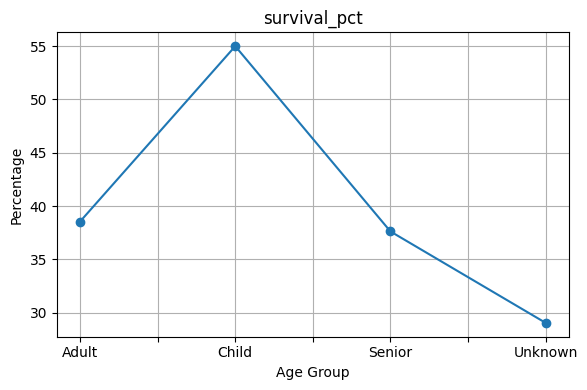

In [9]:
import matplotlib.pyplot as plt
def assign_age_group(row):
    if row['Child']:
        return 'Child'
    elif row['Adult']:
        return 'Adult'
    elif row['Senior']:
        return 'Senior'
    return 'Unknown'

cleaning['AgeGroup'] = cleaning.apply(assign_age_group, axis=1)

# Group by AgeGroup and Survived
survival_pct = (
    cleaning.groupby('AgeGroup')['Survived']
    .mean()
    .sort_index()
    * 100
)

# Plot
survival_pct.plot(marker='o', figsize=(6, 4))
plt.title('survival_pct')
plt.ylabel('Percentage')
plt.xlabel('Age Group')
plt.grid(True)
plt.tight_layout()
plt.show()

drop missing age rows from training model

In [ ]:
cleaning['Age'] = cleaning['Age'].fillna(0)
cleaning = cleaning[cleaning['Age'] !=0]

In [ ]:
cleaning['norm_age'] = (cleaning['Age'] - cleaning['Age'].min()) / (cleaning['Age'].max() - cleaning['Age'].min())
cleaning.head()


In [ ]:
cleaning.drop('Age', axis=1, inplace=True)
cleaning.head()

In [ ]:
cleaning['emb_s'] = (cleaning['Embarked'] == 'S').astype(int)
cleaning['emb_c'] = (cleaning['Embarked'] == 'C').astype(int)
cleaning.head()


In [ ]:
cleaning.drop('Embarked', axis=1, inplace=True)

In [ ]:
cleaning = pd.concat([cleaning, pd.get_dummies(cleaning['Pclass'], prefix='Pclass')], axis=1)
cleaning.head()

Oops, need ints...

In [ ]:
for col in ['Pclass_1','Pclass_2','Pclass_3']:
    cleaning[col] = cleaning[col].astype(int)

drop old pclass, and extra pclass_3 columns

In [ ]:
cleaning = cleaning.drop(['Pclass'], axis=1)
cleaning = cleaning.drop(['Pclass_3'], axis=1)  
cleaning.head()

In [ ]:
cleaning.to_csv('cleaned_train.csv', index=False)

In [ ]:
test_female = cleaning[cleaning['is_male'] == 0]
print(f"female survival rate= {test_female['Survived'].mean() * 100:.2f}%")

In [ ]:
pc_1 = cleaning[cleaning['Pclass_1'] == 1]
pc_2 = cleaning[cleaning['Pclass_2'] == 1]
pc_3 = cleaning[
    (cleaning['Pclass_2'] == 0) & (cleaning['Pclass_1'] == 0)
    ]
print(f"pclass 1 survival rate= {pc_1['Survived'].mean() * 100:.2f}%")
print(f"pclass 2 survival rate= {pc_2['Survived'].mean() * 100:.2f}%")
print(f"pclass 3 survival rate= {pc_3['Survived'].mean() * 100:.2f}%")

In [ ]:
m_pc_1 = pc_1['Fare'].mean()
m_pc_2 = pc_2['Fare'].mean()
m_pc_3 = pc_3['Fare'].mean()
print(f"pclass 1 mean fare= {m_pc_1:.2f}")
print(f"pclass 2 mean fare= {m_pc_2:.2f}")
print(f"pclass 3 mean fare= {m_pc_3:.2f}")

In [ ]:
f_m_pc_1 = cleaning[(cleaning['Pclass_1'] == 1) & (cleaning['is_male'] == 0)]['Fare'].mean()
f_m_pc_2 = cleaning[(cleaning['Pclass_2'] == 1) & (cleaning['is_male'] == 0)]['Fare'].mean()
f_m_pc_3 = cleaning[
    (cleaning['Pclass_2'] == 0) & (cleaning['Pclass_1'] == 0) & (cleaning['is_male'] == 0)
    ]['Fare'].mean()

print(f"female pclass 1 mean fare= {f_m_pc_1:.2f}")
print(f"female pclass 2 mean fare= {f_m_pc_2:.2f}")
print(f"female pclass 3 mean fare= {f_m_pc_3:.2f}")

In [ ]:
f_pc_1 = cleaning[
    (cleaning['Pclass_1'] == 1) & (cleaning['is_male'] == 0)
    ]
f_pc_2 = cleaning[
    (cleaning['Pclass_2'] == 1) & (cleaning['is_male'] == 0)
    ]
f_pc_3 = cleaning[
    (cleaning['Pclass_2'] == 0) & (cleaning['Pclass_1'] == 0) & (cleaning['is_male'] == 0)
    ]
print(f"females of pclass 1 survival rate= {f_pc_1['Survived'].mean() * 100:.2f}%\n")
print(f"females of pclass 2 survival rate= {f_pc_2['Survived'].mean() * 100:.2f}%\n")
print(f"females of pclass 3 survival rate= {f_pc_3['Survived'].mean() * 100:.2f}%\n")

f_pc_1_fare = f_pc_1['Fare'].quantile([.10, 0.25, 0.5, 0.75, .90])
f_pc_2_fare = f_pc_2['Fare'].quantile([.10, 0.25, 0.5, 0.75, .90])
f_pc_3_fare = f_pc_3['Fare'].quantile([.10, 0.25, 0.5, 0.75, .90])
print(f"females of pclass 1 fare quantiles:\n{f_pc_1_fare}\n")
print(f"females of pclass 2 fare quantiles:\n{f_pc_2_fare}\n")
print(f"females of pclass 3 fare quantiles:\n{f_pc_3_fare}\n")

In [ ]:
qs = cleaning['Fare'].quantile([.10, 0.25, 0.5, 0.75, .90])
print(f"Fare quantiles:\n{qs}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
cleaning = train.copy()
cleaning['fare_pct'] = cleaning.groupby('Pclass')['Fare'].rank(pct=True)
bins = np.linspace(0, 1, 11)
decile_labels = (bins[:-1] + bins[1:]) / 2  
cleaning['decile'] = pd.cut(cleaning['fare_pct'], bins=bins, labels=decile_labels, include_lowest=True)

surv_rates = (
    cleaning.groupby(['Pclass', 'decile'])['Survived']
      .mean()
      .reset_index()
)

plt.figure(figsize=(8,5))
for cls in [1, 2, 3]:
    sub = surv_rates[surv_rates['Pclass'] == cls]
    plt.plot(sub['decile'].astype(float) * 100, sub['Survived'], marker='o', label=f'Class {cls}')

plt.title('Survival Rate by Fare Decile Within Each Class')
plt.xlabel('Fare Percentile Within Class (%)')
plt.ylabel('Survival Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(8,5))
colors = {1: 'blue', 2: 'orange', 3: 'green'}
for cls in [1,2,3]:
    sub = surv_rates[surv_rates['Pclass']==cls]
    x = sub['decile'].astype(float)*100
    y = sub['Survived']
    # raw points
    plt.plot(x, y, 'o', label=f'Class {cls} points')
    
    # fit a 3rd-degree polynomial trend line
    coeffs = np.polyfit(x, y, deg=3)
    poly   = np.poly1d(coeffs)
    x_line = np.linspace(x.min(), x.max(), 200)
    plt.plot(x_line, poly(x_line), '--', label=f'Class {cls} trend')
    plt.fill_between(x_line, poly(x_line), alpha=0.1, color=colors[cls])

plt.xlabel('Fare Percentile Within Class (%)')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Fare Decile with Trend Lines')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linewidth=1.5)
plt.show()

In [ ]:
cleaning = train.copy()
cleaning['Age_pct'] = cleaning.groupby('Pclass')['Age'].rank(pct=True)
bins = np.linspace(0, 1, 11)
decile_labels = (bins[:-1] + bins[1:]) / 2  
cleaning['decile'] = pd.cut(cleaning['Age_pct'], bins=bins, labels=decile_labels, include_lowest=True)

surv_rates = (
    cleaning.groupby(['Pclass', 'decile'])['Survived']
      .mean()
      .reset_index()
)

plt.figure(figsize=(8,5))
for cls in [1, 2, 3]:
    sub = surv_rates[surv_rates['Pclass'] == cls]
    plt.plot(sub['decile'].astype(float) * 100, sub['Survived'], marker='o', label=f'Class {cls}')

plt.title('Survival Rate by Age Decile Within Each Class')
plt.xlabel('Age Percentile Within Class (%)')
plt.ylabel('Survival Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
missing_age = train[train['Age'].isna()]
print(f"Number of passengers with missing age: {len(missing_age)}")
print(f"total passengers: {len(train)}")

In [ ]:
pc_1_age_missing = train[
    (train['Pclass'] == 1) & (train['Age'].isna())
    ]
pc_2_age_missing = train[
    (train['Pclass'] == 2) & (train['Age'].isna())
    ]
pc_3_age_missing= train[
    (train['Pclass'] == 3) & (train['Age'].isna())
    ]
print(f"missing age count by class. \npClas1 = {len(pc_1_age_missing)}\n pClass2 = {len(pc_2_age_missing)}\n pClass3 = {len(pc_3_age_missing)} \n")
print(f"missing men count by class. \npClas1 = {(pc_1_age_missing['Sex']=='male').sum()} \npClass2 = {(pc_2_age_missing['Sex']=='male').sum()} \npClass3 = {(pc_3_age_missing['Sex']=='male').sum()} \n")


In [ ]:
train['cabin_height'] = train['Cabin'].str.extract(r'([A-Z])', expand=False)

for cabin in train['cabin_height'].unique():
    if cabin is not None:
        print(f"cabin {cabin} count = {len(train[train['cabin_height'] == cabin])}, survived = {train[train['cabin_height'] == cabin]['Survived'].mean() * 100:.2f}%")
